In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as s



In [2]:
header_list = ["id_mutation",'date_mutation','numero_disposition','nature_mutation','valeur_fonciere','adresse_numero','adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','code_commune','nom_commune','code_departement','ancien_code_commune','ancien_nom_commune','id_parcelle','ancien_id_parcelle','numero_volume','lot1_numero','lot1_surface_carrez','lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','nombre_lots','code_type_local','type_local','surface_reelle_bati','nombre_pieces_principales','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale','surface_terrain','longitude','latitude','section_prefixe']

In [3]:
### On teste header list sur 76575_000AB

In [4]:
df = pd.read_csv('76575_000AB.csv',sep = ';' ,names=header_list)
#print(df.to_string())
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB


### 1- Combiner tout les fichiers CSV

In [5]:
#On liste tous les fichiers csv qu'on a
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['76575_000AB.csv',
 '76575_000AC.csv',
 '76575_000AD.csv',
 '76575_000AE.csv',
 '76575_000AH.csv',
 '76575_000AI.csv',
 '76575_000AK.csv',
 '76575_000AL.csv',
 '76575_000AM.csv',
 '76575_000AO.csv',
 '76575_000AP.csv',
 '76575_000AR.csv',
 '76575_000AS.csv',
 '76575_000AT.csv',
 '76575_000AV.csv',
 '76575_000AW.csv',
 '76575_000AX.csv',
 '76575_000AY.csv',
 '76575_000AZ.csv',
 '76575_000BC.csv',
 '76575_000BD.csv',
 '76575_000BE.csv',
 '76575_000BH.csv',
 '76575_000BK.csv',
 '76575_000BL.csv',
 '76575_000BM.csv',
 '76575_000BN.csv',
 '76575_000BO.csv',
 '76575_000BP.csv',
 '76575_000BR.csv',
 '76575_000BS.csv',
 '76575_000BT.csv',
 '76575_000BV.csv',
 '76575_000BW.csv']

In [6]:
df_concat = pd.concat([pd.read_csv(f,sep = ';' ,names=header_list) for f in csv_files ], ignore_index=True)
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3003,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3004,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [7]:
df_concat.shape

(3006, 41)

In [8]:
###On supprime les lignes qui montre la distribution des collones
df_concat.drop(df_concat[df_concat['valeur_fonciere'] =='valeur_fonciere'].index, inplace = True)
df_concat.shape

(2972, 41)

### 2-Cleaning dataset and reducing dimentions

In [9]:
df_concat.describe()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
count,2972,2972,2972,2972,2922,2487,2972,2972,2972,2972,...,1613,2197,2972,2972,2972,2972,2515,2945,2945,2972
unique,1515,811,5,5,699,224,6,320,320,2,...,210,14,10,10,4,4,780,1610,1599,34
top,2021-1182571,2021-08-27,1,Vente,86000.0,6.0,None,RUE PAUL ELUARD,1890,76800,...,80.0,0.0,S,sols,None,None,500.0,1.090742,49.390142,000BV
freq,75,82,2800,2863,83,143,2855,147,147,2957,...,139,716,2058,2058,2884,2884,106,74,74,236


In [10]:
###Convertir None to nan afin de la détecter 
df_concat = df_concat.replace(to_replace='None', value=np.nan)


1- On va chercher s'il y'a des colonnes avec des valeurs Null

In [11]:
### Combien de valeur nul on a dans chaque colonne
df_concat.isnull().sum()

id_mutation                        0
date_mutation                      0
numero_disposition                 0
nature_mutation                    0
valeur_fonciere                   50
adresse_numero                   485
adresse_suffixe                 2855
adresse_nom_voie                  15
adresse_code_voie                 15
code_postal                       15
code_commune                       0
nom_commune                        0
code_departement                   0
ancien_code_commune             2972
ancien_nom_commune              2972
id_parcelle                        0
ancien_id_parcelle              2972
numero_volume                   2966
lot1_numero                     2525
lot1_surface_carrez             2808
lot2_numero                     2809
lot2_surface_carrez             2938
lot3_numero                     2910
lot3_surface_carrez             2962
lot4_numero                     2968
lot4_surface_carrez             2972
lot5_numero                     2968
l

In [12]:
### Le pourcentage des valeur nul qu'on a dans chaque colonne
df_concat.isnull().sum()*100/df_concat.shape[0]

id_mutation                       0.000000
date_mutation                     0.000000
numero_disposition                0.000000
nature_mutation                   0.000000
valeur_fonciere                   1.682369
adresse_numero                   16.318977
adresse_suffixe                  96.063257
adresse_nom_voie                  0.504711
adresse_code_voie                 0.504711
code_postal                       0.504711
code_commune                      0.000000
nom_commune                       0.000000
code_departement                  0.000000
ancien_code_commune             100.000000
ancien_nom_commune              100.000000
id_parcelle                       0.000000
ancien_id_parcelle              100.000000
numero_volume                    99.798116
lot1_numero                      84.959623
lot1_surface_carrez              94.481830
lot2_numero                      94.515478
lot2_surface_carrez              98.855989
lot3_numero                      97.913863
lot3_surfac

Notre décision donc est de supprimer tous les colonnes qui ont des valeurs nuls.Sauf les caractéristiques qui vont influencés le prix de la maison.Dans ce cas, on va supprimer les maisons dont les  valeurs de ces caractéristiques important sont nuls 

In [13]:
###On commence par supprimer les colonnes qui ont des valeurs nuls
List = ['adresse_numero','adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','ancien_code_commune','ancien_nom_commune','ancien_id_parcelle','numero_volume','lot1_surface_carrez','lot1_numero','lot2_numero','lot2_surface_carrez','lot3_surface_carrez','lot3_numero','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','code_type_local','type_local','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale']
for i in List:
    df_concat.drop(i, inplace=True, axis=1)

In [14]:
df_concat.shape

(2972, 16)

In [15]:
### Collone qui reste
df_concat.iloc[0][:]

id_mutation                               2022-360375
date_mutation                              2022-04-21
numero_disposition                                  1
nature_mutation                                 Vente
valeur_fonciere                              260000.0
code_commune                                    76575
nom_commune                  Saint-Étienne-du-Rouvray
code_departement                                   76
id_parcelle                            76575000AB0065
nombre_lots                                         0
surface_reelle_bati                             129.0
nombre_pieces_principales                         4.0
surface_terrain                                 351.0
longitude                                    1.071855
latitude                                    49.401886
section_prefixe                                 000AB
Name: 1, dtype: object

In [16]:
df_concat.describe()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe
count,2972,2972,2972,2972,2922,2972,2972,2972,2972,2972,1613,2197,2515,2945,2945,2972
unique,1515,811,5,5,699,1,1,1,1668,7,210,14,780,1610,1599,34
top,2021-1182571,2021-08-27,1,Vente,86000.0,76575,Saint-Étienne-du-Rouvray,76,76575000AI0322,0,80.0,0.0,500.0,1.090742,49.390142,000BV
freq,75,82,2800,2863,83,2972,2972,2972,74,2525,139,716,106,74,74,236


In [17]:
#On passe maintenant à supprimer les caractéristiques non null mais qui n'influence pas le prix de la maison
List2 = ['id_mutation','date_mutation','numero_disposition','nature_mutation','code_commune','nom_commune','code_departement','id_parcelle','nombre_lots','section_prefixe']
for i in List2:
    df_concat.drop(i, inplace=True, axis=1)
    

In [18]:
df_concat.shape

(2972, 6)

In [19]:
### Et maintenant , pour les 6 carastéristiques qui nous restent , on va supprimer les lignes dont une de ces caracteristiqes
### a une valeur null.
df_concat=df_concat.dropna()
df_concat.shape

(1325, 6)

In [20]:
df_concat.describe()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,1325,1325,1325,1325,1325,1325
unique,516,199,13,601,1019,1017
top,1.0,80.0,4.0,15640.0,1.089459,49.394605
freq,37,120,425,37,37,37


In [21]:
###On verifie maintenant qu'on a plus de valeur null
df_concat.isnull().sum()*100/df_concat.shape[0] 

valeur_fonciere              0.0
surface_reelle_bati          0.0
nombre_pieces_principales    0.0
surface_terrain              0.0
longitude                    0.0
latitude                     0.0
dtype: float64

In [22]:
df_concat=df_concat.reset_index(drop=True)
df_concat

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,129.0,4.0,351.0,1.071855,49.401886
1,160000.0,64.0,4.0,452.0,1.070963,49.402764
2,174000.0,64.0,4.0,498.0,1.070475,49.403622
3,200000.0,18.0,1.0,105.0,1.074902,49.403036
4,200000.0,68.0,0.0,105.0,1.074902,49.403036
...,...,...,...,...,...,...
1320,189300.0,80.0,4.0,354.0,1.071759,49.399769
1321,1.2,3544.0,0.0,17330.0,1.077618,49.385026
1322,1000000.0,87.0,3.0,3973.0,1.059789,49.390736
1323,1000000.0,1048.0,0.0,3973.0,1.059789,49.390736


### 3- detection et supression des outliers

- pour l'instant , il nous reste 6 caractéristiques

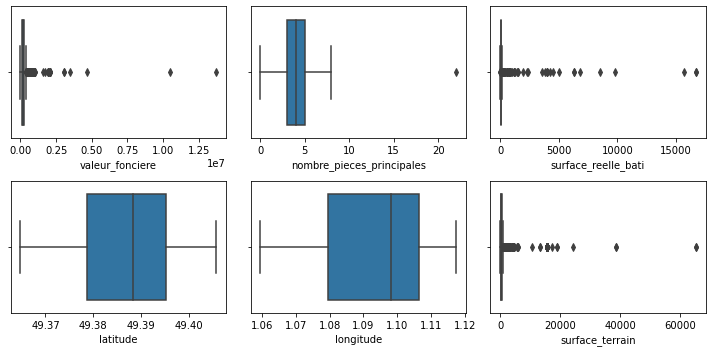

In [23]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['latitude']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['longitude']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour les caractéristiques latitude,longitude , on a pas d'outliers

- Pour le nombre de pieces principales , on a une seul outlier :

In [24]:
print(np.where(pd.to_numeric(df_concat['nombre_pieces_principales'])>8))


(array([1188], dtype=int64),)


In [25]:
df_concat.iloc[1188]['nombre_pieces_principales']

'22.0'

In [26]:
###On supprime cette ligne
df_concat.drop(1188,inplace=True, axis=0)

- Pour les valeur_fonciere  :

On va utiliser la méthode Inter Quartile Range

In [27]:
Q1 = pd.to_numeric(df_concat['valeur_fonciere']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['valeur_fonciere']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['valeur_fonciere']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['valeur_fonciere']) <= Q3 + 1.5*IQR)]


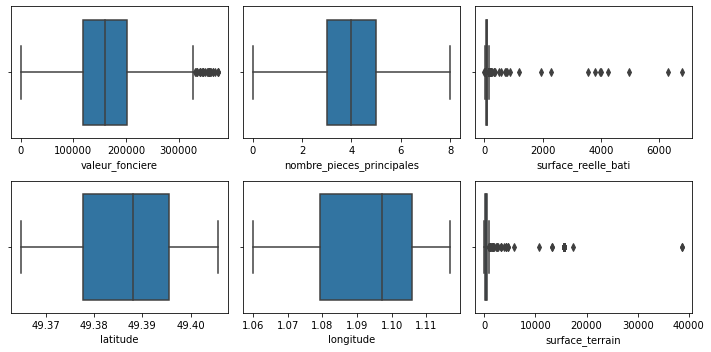

In [28]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['latitude']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['longitude']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour la surface réel du batiment  :

On va utiliser la méthode Inter Quartile Range

In [29]:
Q1 = pd.to_numeric(df_concat['surface_reelle_bati']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['surface_reelle_bati']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['surface_reelle_bati']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['surface_reelle_bati']) <= Q3 + 1.5*IQR)]

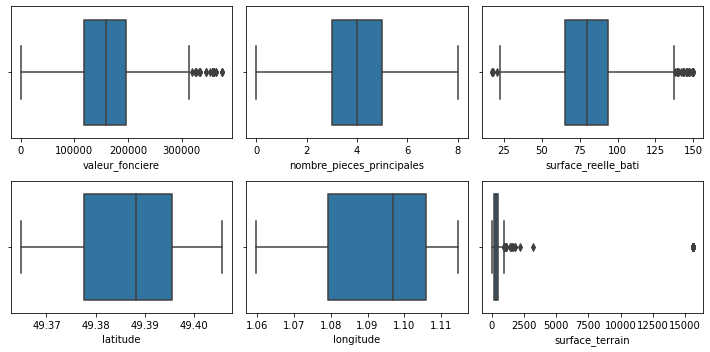

In [30]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['latitude']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['longitude']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

In [31]:
df_concat.shape

(1135, 6)

- Pour la surface du terrain :

In [32]:
Q1 = pd.to_numeric(df_concat['surface_terrain']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['surface_terrain']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['surface_terrain']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['surface_terrain']) <= Q3 + 1.5*IQR)]

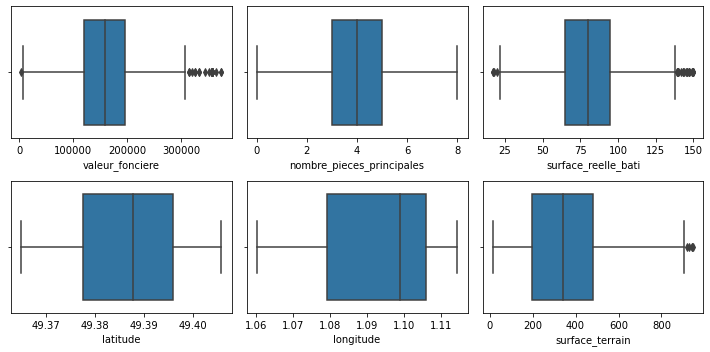

In [33]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat['latitude']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat['longitude']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

##Les données apres cleaning et reduction de dimention

In [34]:
df_concat

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,129.0,4.0,351.0,1.071855,49.401886
1,160000.0,64.0,4.0,452.0,1.070963,49.402764
2,174000.0,64.0,4.0,498.0,1.070475,49.403622
3,200000.0,18.0,1.0,105.0,1.074902,49.403036
4,200000.0,68.0,0.0,105.0,1.074902,49.403036
...,...,...,...,...,...,...
1315,158500.0,97.0,5.0,406.0,1.074306,49.400785
1317,145000.0,74.0,5.0,374.0,1.072432,49.400659
1318,262500.0,102.0,5.0,434.0,1.069653,49.39931
1319,130000.0,64.0,4.0,369.0,1.072534,49.4006


### 4- Visualisation des données 

Le but de cette partie est d'abord comprendre les données , mais aussi trouver si une caractéristique influence directement le prix des maisons .

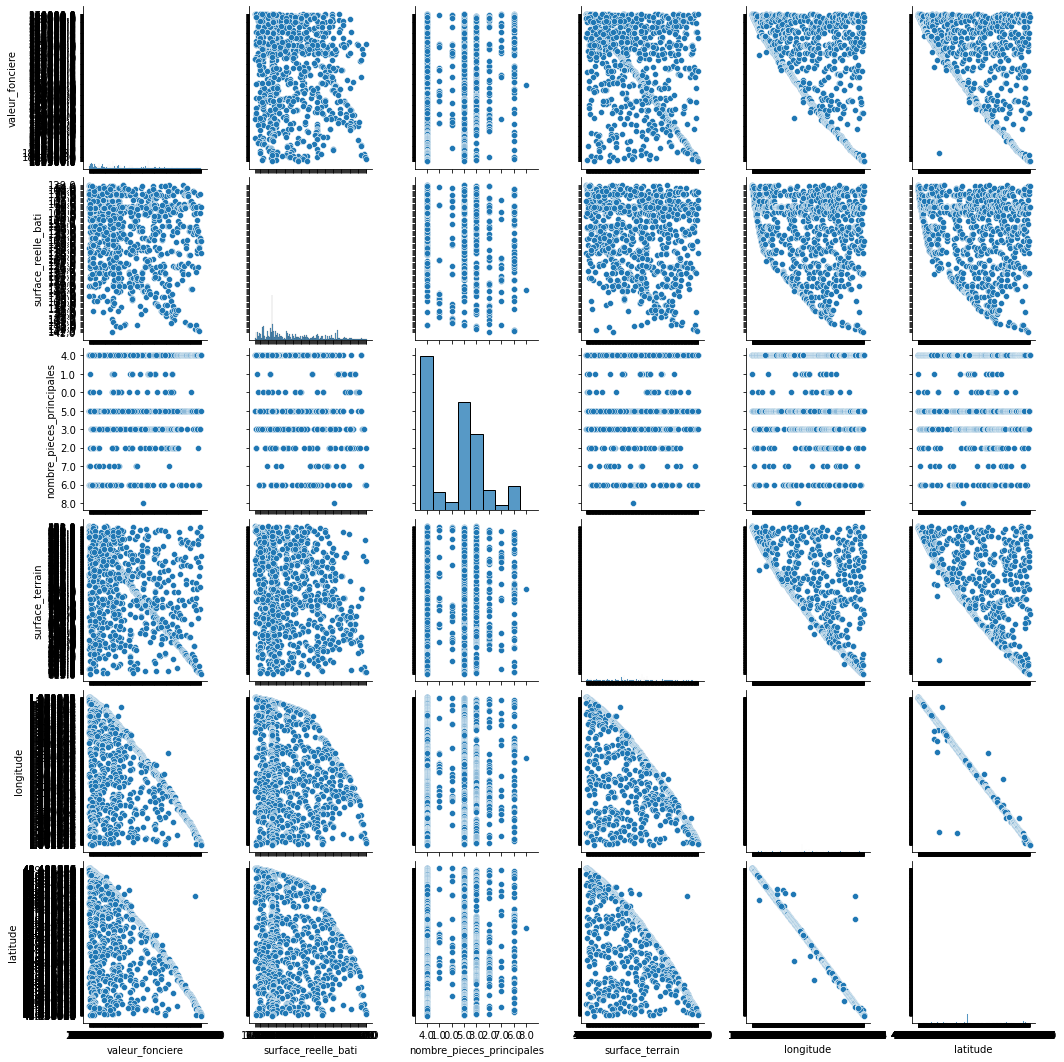

In [35]:
sns.pairplot(df_concat, vars=["valeur_fonciere","surface_reelle_bati","nombre_pieces_principales","surface_terrain", "longitude","latitude"])
plt.show()

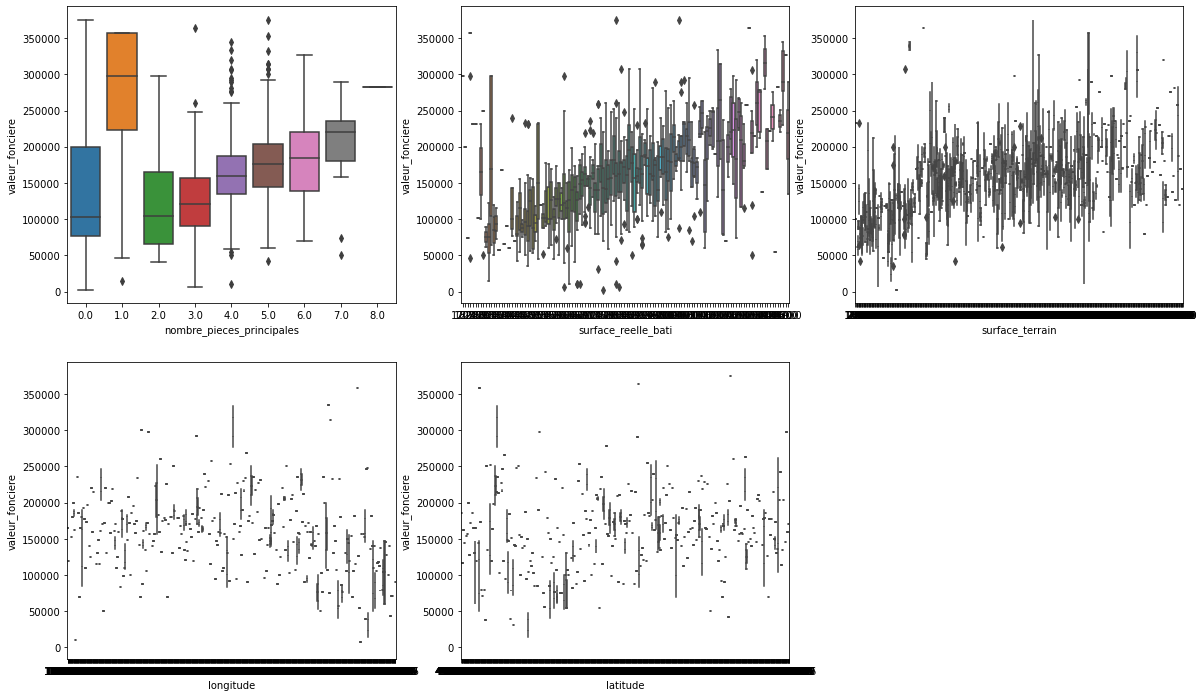

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = pd.to_numeric(df_concat['nombre_pieces_principales']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,2)
sns.boxplot(x = pd.to_numeric(df_concat['surface_reelle_bati']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,3)
sns.boxplot(x = pd.to_numeric(df_concat['surface_terrain']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,4)
sns.boxplot(x = pd.to_numeric(df_concat['longitude']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,5)
sns.boxplot(x = pd.to_numeric(df_concat['latitude']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.show()

In [224]:
df_concat

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,129.0,4.0,351.0,1.071855,49.401886
1,160000.0,64.0,4.0,452.0,1.070963,49.402764
2,174000.0,64.0,4.0,498.0,1.070475,49.403622
3,200000.0,18.0,1.0,105.0,1.074902,49.403036
4,200000.0,68.0,0.0,105.0,1.074902,49.403036
...,...,...,...,...,...,...
1315,158500.0,97.0,5.0,406.0,1.074306,49.400785
1317,145000.0,74.0,5.0,374.0,1.072432,49.400659
1318,262500.0,102.0,5.0,434.0,1.069653,49.39931
1319,130000.0,64.0,4.0,369.0,1.072534,49.4006


### 5- Séparation des données en train et test

In [169]:
np.random.seed(0)
df_train, df_test = train_test_split(df_concat, train_size = 0.7, test_size = 0.3, random_state = 100)

### 6- Normalization des données

Le but de cette partie est de s'assurer que les coefficient obtenu sont dans le meme scale

In [170]:
### before scalling
df_train.describe()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,755,755,755,755,755,755
unique,355,119,9,444,669,669
top,357500.0,80.0,4.0,500.0,1.107834,49.371362
freq,19,71,283,15,19,19


In [171]:
scaler = MinMaxScaler()
carac = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude','latitude']

df_train[carac] = scaler.fit_transform(df_train[carac])

In [172]:
### after scalling
df_train.describe()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.437019,0.481342,0.495199,0.357997,0.620653,0.535783
std,0.177823,0.196734,0.164126,0.216914,0.264060,0.251035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.327823,0.360902,0.375000,0.191192,0.354069,0.309477
50%,0.423387,0.473684,0.500000,0.351235,0.724472,0.542993
75%,0.526882,0.593985,0.625000,0.497852,0.849369,0.760166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


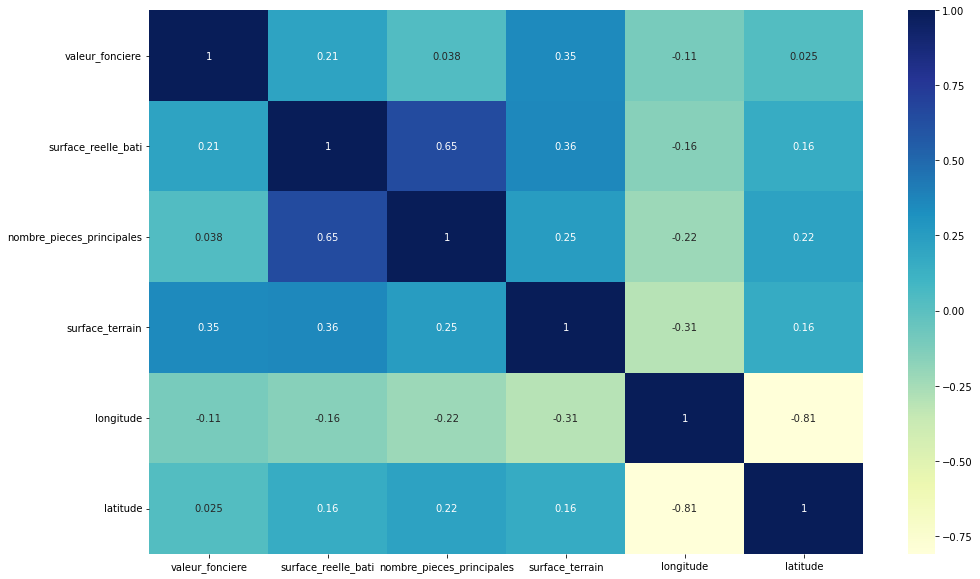

In [173]:
###Check the correlation between the caracteristiques
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- On remarque que la surface de terrain est la plus correler avec la valeur fonciere

### 7-création de modéle

In [174]:
### diviser les données 
y_train = df_train.pop('valeur_fonciere')
X_train = df_train

In [175]:
###Modele utilisé :  LinearRegression et RFE de scikit learn(Recursive feature elimination)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [176]:
###Running rfe
rfe = RFE(lm,n_features_to_select=3)

In [177]:
rfe = rfe.fit(X_train, y_train)

In [178]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('surface_reelle_bati', True, 1),
 ('nombre_pieces_principales', True, 1),
 ('surface_terrain', True, 1),
 ('longitude', False, 3),
 ('latitude', False, 2)]

In [179]:
col = X_train.columns[rfe.support_]
col

Index(['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain'], dtype='object')

In [180]:
X_train.columns[~rfe.support_]

Index(['longitude', 'latitude'], dtype='object')

In [181]:
### On utilise des statsmodelsapi pour avoir des informations statistiques
X_train_rfe = X_train[col]
X_train_rfe = s.add_constant(X_train_rfe)

In [183]:
lm = s.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     44.60
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.58e-26
Time:                        18:38:24   Log-Likelihood:                 294.95
No. Observations:                 755   AIC:                            -581.9
Df Residuals:                     751   BIC:                            -563.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [184]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.11
1,surface_reelle_bati,1.87
2,nombre_pieces_principales,1.74
3,surface_terrain,1.15


In [186]:
###check errors

In [187]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

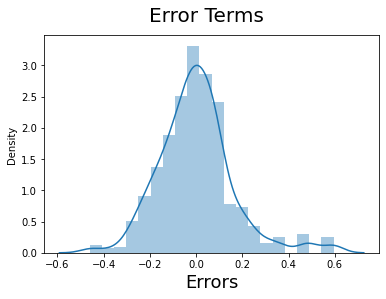

In [188]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

### Evaluation

In [189]:
num_vars = ['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain','valeur_fonciere']

In [190]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [191]:
##On divise 
y_test = df_test.pop('valeur_fonciere')
X_test = df_test

In [192]:
# Adding constant variable to test dataframe
X_test = s.add_constant(X_test)

In [193]:
###Utilisons notre modele pour faire des prédicitions
X_test_rfe = X_test[X_train_rfe.columns]
y_pred = lm.predict(X_test_rfe)

In [194]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.16553435010568907

### Lasso

In [225]:
np.random.seed(0)
df_train, df_test = train_test_split(df_concat, train_size = 0.7, test_size = 0.3, random_state = 100)

In [226]:
scaler = MinMaxScaler()
carac = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude','latitude']

df_train[carac] = scaler.fit_transform(df_train[carac])
df_test[carac] = scaler.fit_transform(df_test[carac])

In [227]:
### diviser les données 
y_train_2 = df_train.pop('valeur_fonciere')
X_train_2 = df_train

In [228]:
y_test_2 = df_test.pop('valeur_fonciere')
X_test_2 = df_test

In [229]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train_2, y_train_2)
#reg.score(X_train_2, y_train_2)

In [230]:
###Utilisons notre modele pour faire des prédicitions
y_pred_2 = reg.predict(X_test_2)

In [231]:
from sklearn.metrics import r2_score 
r2_score(y_test_2, y_pred_2)

0.16632223058591755